# Housing Data Analysis
## Baseline for Neural Network

This notebook provide baseline analysis for Neural Networks for the Housing dataset

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve, train_test_split, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve,accuracy_score, classification_report

### Load and Process Data

In [37]:
def load_housing_data(filename):
   df = pd.read_csv(filename)
   # Assume 'salePrice' is the target column and the rest are features
   X = df.drop(columns=['SalePrice'])
   y = df['SalePrice']
   # Convert target to binary (e.g., above median price as 1, below as 0)
   median_price = y.median()
   y = (y > median_price).astype(int)
   return X, y

### Plotting functions

In [38]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std, alpha=0.1,
                        color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std, alpha=0.1,
                        color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
                label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
                label='Cross-validation score')

    plt.legend(loc='best')
    return plt

def plot_validation_curve(estimator, title, X, y, param_name, param_range, cv=None, n_jobs=None):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name=param_name, param_range=param_range,cv=cv, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.figure()
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.plot(param_range, train_scores_mean, label="Training score", color='r')
    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color='g')
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.2, color='r')
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.2, color='g')
    plt.legend(loc="best")
    plt.grid()
    return plt

### Load data and initialize the models

/Users/atomar/Desktop/CSE 7641_ML/Housing_Weather_UL_Dim_Reduction/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/atomar/Desktop/CSE 7641_ML/Housing_Weather_UL_Dim_Reduction/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/atomar/Desktop/CSE 7641_ML/Housing_Weather_UL_Dim_Reduction/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/atomar/Desktop/CSE 7641_ML/Housing_Weather_UL_Dim_Reduction/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilaye

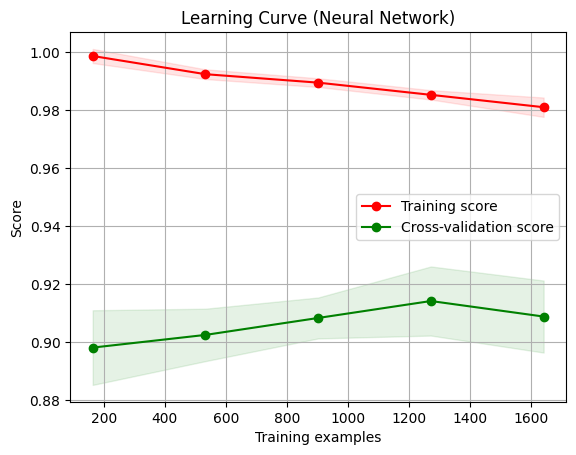

In [39]:
# Load the housing data
housing_data_file = '../data/housing/housing_data_cleaned.csv'  # Replace with your file path
X, y = load_housing_data(housing_data_file)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=500))
])

plot_learning_curve(nn_pipeline, "Learning Curve (Neural Network)", X_train, y_train, cv=5)
plt.savefig("../figures/housing_figures/baseline_learning_curve_nn.png")

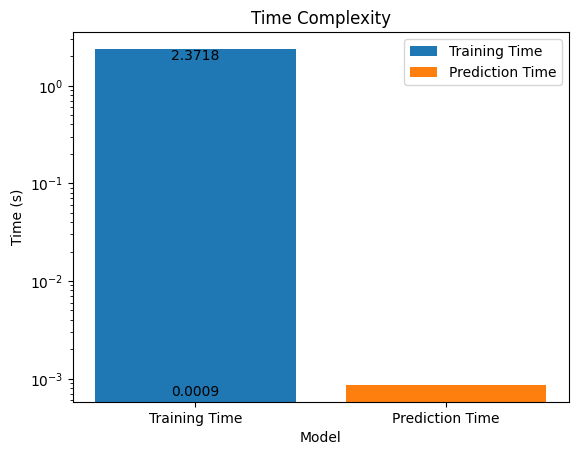

In [40]:
import time

# function to measure time complexity of a model
def measure_time_complexity(estimator,X_train,y_train,X_test):
    #measure training time
    start_time = time.time()
    estimator.fit(X_train,y_train)
    training_time = time.time() - start_time

    #measure prediction time
    start_time = time.time()
    estimator.predict(X_test)
    prediction_time = time.time() - start_time

    return training_time, prediction_time

# initialize list to store time complexity
training_times = []
prediction_times = []

#measure time complexity for the neural network model
nn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,),max_iter=2000,alpha=0.0001))
])
training_time, prediction_time = measure_time_complexity(nn_pipeline,X_train,y_train,X_test)
training_times.append(training_time)
prediction_times.append(prediction_time)

#plot time complexity
plt.figure()
plt.bar(['Training Time'],training_times, label='Training Time')
plt.bar(['Prediction Time'],prediction_times, label='Prediction Time')
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.yscale('log')
plt.title('Time Complexity')
plt.legend()

# Add value labels to the bars
for i, v in enumerate(training_times):
    plt.text(i, v, str(round(v, 4)), ha='center', va='top')
for i, v in enumerate(prediction_times):
    plt.text(i, v, str(round(v, 4)), ha='center', va='top')

plt.savefig("../figures/housing_figures/time_complexity.png")


In [41]:
# create a Dataframe to store the results
time_comparsion = pd.DataFrame({
    'Model':nn_pipeline.named_steps['mlp'].__class__.__name__,
    'Training Time':training_times,
    'Prediction Time':prediction_times
})
print(time_comparsion)


           Model  Training Time  Prediction Time
0  MLPClassifier       2.371761         0.000864


In [42]:
# neural network confusion matrix
nn_pipeline.fit(X_train, y_train)
y_pred = nn_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.92      0.93       427
           1       0.92      0.95      0.94       452

    accuracy                           0.93       879
   macro avg       0.93      0.93      0.93       879
weighted avg       0.93      0.93      0.93       879

0.9328782707622298


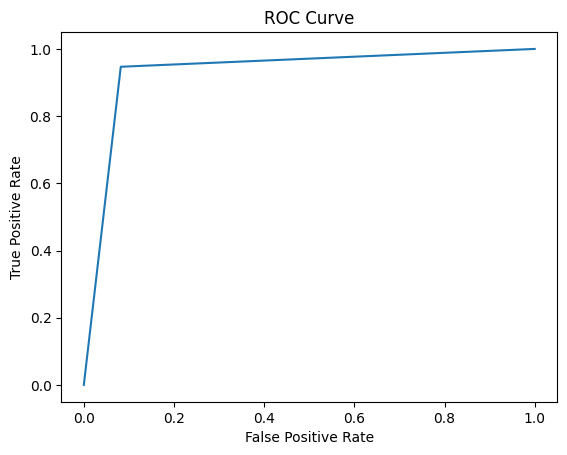

In [43]:
# roc curve neural network
fpr,tpr,_ = roc_curve(y_test,y_pred)
plt.figure()
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig("../figures/housing_figures/roc_curve_nn.png")